# Problem Set 4: Jeremy Marcus Tan

## Problem 1

In [1]:
import statistics
import random as rand
import math
def analyze(Y):
    samp_mean = statistics.mean(Y)
    samp_sd = statistics.stdev(Y)
    samp_var = samp_sd ** 2
    Z = statistics.NormalDist()
    alpha = 0.05
    Z_alpover2 = Z.inv_cdf(1 - alpha/2)
    margin_of_error = Z_alpover2 * samp_sd / (N**0.5)
    print(f'point estimate: {samp_mean}')
    print(f'variance: {samp_var}')
    print(f'95% CI: ({samp_mean - margin_of_error}, {samp_mean + margin_of_error})')
    print(f'relative error: {samp_sd / (math.sqrt(N)*samp_mean)}')

In [2]:
def f(x,y): 
    return (32*x*y*math.sin(y)) / ((1 + x**4)*(1 + (math.cos(y))**2))

In [3]:
# Problem 1a: use two independent uniform random variables

def method1a():
    u1 = rand.uniform(0, 1)
    u2 = rand.uniform(0, math.pi)
    return math.pi * f(u1,u2)

# Problem 1b: use one uniform random variable and one normally distributed variable

def method1b():
    x = rand.uniform(0,1)
    y = rand.normalvariate(math.pi/2, 1)
    if 0 <= y <= math.pi:
        return f(x,y) * math.sqrt(2*math.pi)*math.exp((1/2) * (y - (math.pi/2))**2)
    else:
        return 0
    



In [4]:
N = 1000
method1a_samples = []
method1b_samples = []
rand.seed(30)
for i in range(N):
    m1 = method1a()
    method1a_samples.append(m1)
    m2 = method1b()
    method1b_samples.append(m2)
print("Method 1a: Basic Monte Carlo Integration")
analyze(method1a_samples)
print('\n')
print("Method 1b: Monte Carlo Integration with Weighted Samples")
analyze(method1b_samples)

Method 1a: Basic Monte Carlo Integration
point estimate: 31.29470650114871
variance: 830.7766885159734
95% CI: (29.508259066118296, 33.08115393617912)
relative error: 0.029125357715292573


Method 1b: Monte Carlo Integration with Weighted Samples
point estimate: 31.26920659034401
variance: 666.1346639317858
95% CI: (29.66954135019816, 32.86887183048986)
relative error: 0.02610142120935858


## Problem 2d

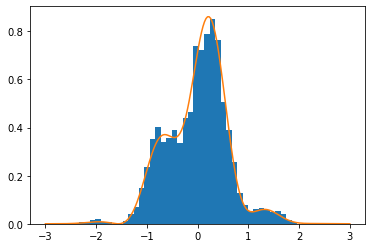

In [151]:
# First define f2(x) - to differentiate from the earlier f(x)
rand.seed(50)
def f2(x): 
    return math.exp(-(x**2))*(2 + math.cos(2*x) + math.sin(5*x))

states = [0]

while len(states) <= 10000: # until T = 10000, starting from T = 0
    i = states[-1] # i is the current state
    # Draw the proposed state from N(i,1)
    j = rand.normalvariate(i, 1)
    
    alpha = min(1, f2(j)/f2(i))
    
    p = rand.random()
    
    if p <= alpha:
    # accept the proposed state
        next_state = j
    else:
    # reject the proposed state
        next_state = i
    
    states.append(next_state)

import matplotlib.pyplot as plt
import numpy as np

plt.hist(states, bins = 50, density = True)
x = np.linspace(-3,3,200)
y = 0.2382*np.exp(-x*x)*(2+np.cos(2*x) + np.sin(5*x))
plt.plot(x,y)
plt.show()